In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("laptop_price (2).csv", sep=',', encoding='latin-1')

#### Удалим ненужный столбец:

In [3]:
df.drop(columns=['laptop_ID'], inplace=True)

In [4]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [6]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### Проверим дубликаты:

In [7]:
df.loc[df.duplicated(keep=False)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1262,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1263,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1264,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1265,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1266,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1267,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1268,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1269,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.loc[df.duplicated(keep=False)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


#### Поправим наши данные:

In [10]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [11]:
df['Ram'].value_counts()

Ram
8GB     613
4GB     367
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: count, dtype: int64

In [12]:
df['Ram'] = df['Ram'].str[:-2]

In [13]:
df['Weight'].value_counts()

Weight
2.2kg     117
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      37
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [14]:
df['Weight'] = df['Weight'].str[:-2]

In [15]:
# Изменение типа данных на int для столбцов Ram и Memory
df['Ram'] = df['Ram'].astype(int)

In [16]:
# Изменение типа данных на float для столбцов Inches, Weight и Price_euros
df['Inches'] = df['Inches'].astype(float)
df['Weight'] = df['Weight'].astype(float)
df['Price_euros'] = df['Price_euros'].astype(float)

<Axes: >

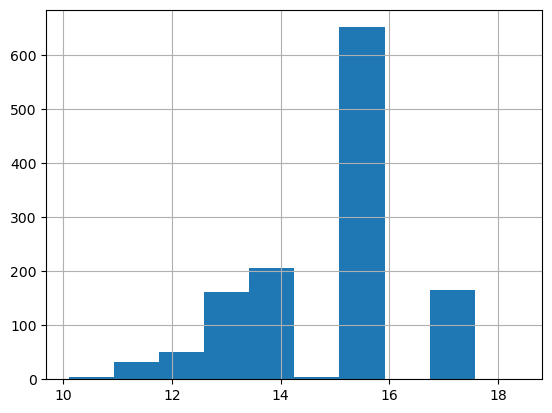

In [17]:
df['Inches'].hist()

<Axes: >

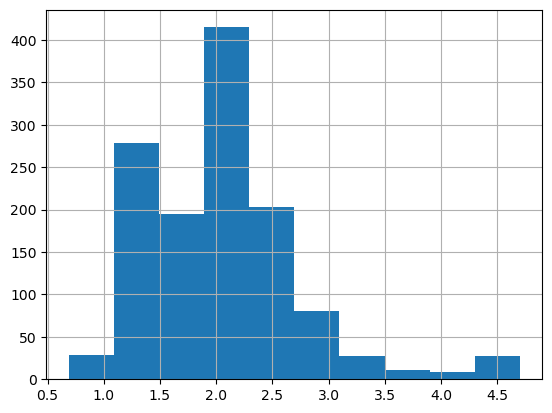

In [18]:
df['Weight'].hist()

In [19]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94


In [20]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [21]:
df['Memory'] = df['Memory'].str.replace('[a-zA-Z]', '', regex=True)

In [22]:
df['Memory'].value_counts()

Memory
256             412
1               229
500             124
512             114
128  +  1        94
128              75
256  +  1        73
32               36
2                16
512  +  1        14
64               13
256  +  2        10
256               8
1.0               8
16                7
32                7
180               5
128               4
512  +  2         3
16                3
1  +  1           3
256  +  500       2
128  +  2         2
256  +  256       2
512               2
240               1
512  +  1.0       1
508               1
8                 1
64                1
64   +  1         1
512  +  256       1
512  +  512       1
256  +  1.0       1
Name: count, dtype: int64

In [23]:
# Разделение столбца Memory на два новых столбца
df[['Memory_1', 'Memory_2']] = df['Memory'].str.split('+', expand=True)

In [24]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_1,Memory_2
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,None
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,128,None


In [25]:
df['Memory_1'] = df['Memory_1'].astype(float)

In [26]:
df['Memory_2'] = df['Memory_2'].astype(float)

In [27]:
# Замена значений
df.loc[df['Memory_1'] == 1, 'Memory_1'] = 1000
df.loc[df['Memory_1'] == 2, 'Memory_1'] = 2000

In [28]:
# Замена значений
df.loc[df['Memory_2'] == 1, 'Memory_2'] = 1000
df.loc[df['Memory_2'] == 2, 'Memory_2'] = 2000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   int32  
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float64
 11  Price_euros       1275 non-null   float64
 12  Memory_1          1275 non-null   float64
 13  Memory_2          208 non-null    float64
dtypes: float64(5), int32(1), object(8)
memory usage: 144.4+ KB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1275 non-null   object 
 1   Product           1275 non-null   object 
 2   TypeName          1275 non-null   object 
 3   Inches            1275 non-null   float64
 4   ScreenResolution  1275 non-null   object 
 5   Cpu               1275 non-null   object 
 6   Ram               1275 non-null   int32  
 7   Memory            1275 non-null   object 
 8   Gpu               1275 non-null   object 
 9   OpSys             1275 non-null   object 
 10  Weight            1275 non-null   float64
 11  Price_euros       1275 non-null   float64
 12  Memory_1          1275 non-null   float64
 13  Memory_2          208 non-null    float64
dtypes: float64(5), int32(1), object(8)
memory usage: 144.4+ KB


In [31]:
df['Memory_1'].fillna(0, inplace=True)
df['Memory_2'].fillna(0, inplace=True)

In [32]:
df.drop(columns=['Memory'], inplace=True)

In [33]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory_1,Memory_2
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,0.0


In [34]:
df.columns = df.columns.str.lower()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu               1275 non-null   object 
 6   ram               1275 non-null   int32  
 7   gpu               1275 non-null   object 
 8   opsys             1275 non-null   object 
 9   weight            1275 non-null   float64
 10  price_euros       1275 non-null   float64
 11  memory_1          1275 non-null   float64
 12  memory_2          1275 non-null   float64
dtypes: float64(5), int32(1), object(7)
memory usage: 134.5+ KB


#### Обработаем нечисловые столбцы:

In [36]:
df.head(2)

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,price_euros,memory_1,memory_2
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,0.0


In [37]:
df.screenresolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [38]:
df['pic'] = df['screenresolution'].str.rsplit(n=1).str[-1]

In [39]:
df['pic']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1270    1920x1080
1271    3200x1800
1272     1366x768
1273     1366x768
1274     1366x768
Name: pic, Length: 1275, dtype: object

In [40]:
df[['pic_width', 'pic_height']] = df['pic'].str.split('x', expand=True)

In [41]:
df

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,price_euros,memory_1,memory_2,pic,pic_width,pic_height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,2560x1600,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,0.0,1440x900,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,1920x1080,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,2880x1800,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,2560x1600,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,128.0,0.0,1920x1080,1920,1080
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,512.0,0.0,3200x1800,3200,1800
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,64.0,0.0,1366x768,1366,768
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000.0,0.0,1366x768,1366,768


In [42]:
df['pic_width'] = df['pic_width'].astype(int)
df['pic_height'] = df['pic_height'].astype(int)

In [43]:
df

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,price_euros,memory_1,memory_2,pic,pic_width,pic_height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,2560x1600,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,0.0,1440x900,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,1920x1080,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512.0,0.0,2880x1800,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256.0,0.0,2560x1600,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,638.00,128.0,0.0,1920x1080,1920,1080
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,512.0,0.0,3200x1800,3200,1800
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,229.00,64.0,0.0,1366x768,1366,768
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000.0,0.0,1366x768,1366,768


In [44]:
df['pic'] = df['pic_width'] * df['pic_height']

In [45]:
df.drop(columns=['pic_height'], inplace=True)

In [46]:
df.head(3)

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,price_euros,memory_1,memory_2,pic,pic_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128.0,0.0,4096000,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128.0,0.0,1296000,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256.0,0.0,2073600,1920


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu               1275 non-null   object 
 6   ram               1275 non-null   int32  
 7   gpu               1275 non-null   object 
 8   opsys             1275 non-null   object 
 9   weight            1275 non-null   float64
 10  price_euros       1275 non-null   float64
 11  memory_1          1275 non-null   float64
 12  memory_2          1275 non-null   float64
 13  pic               1275 non-null   int32  
 14  pic_width         1275 non-null   int32  
dtypes: float64(5), int32(3), object(7)
memory usage: 144.4+ KB


In [48]:
df['IPS_Panel'] = df['screenresolution'].str.contains('IPS Panel').astype(int)
df['Touchscreen'] = df['screenresolution'].str.contains('Touchscreen').astype(int)
df['Full_HD'] = df['screenresolution'].str.contains('Full HD').astype(int)
df['Quad_HD+'] = df['screenresolution'].str.contains('Quad HD+').astype(int)
df['4K_Ultra_HD'] = df['screenresolution'].str.contains('4K Ultra HD').astype(int)
df['Retina_Display'] = df['screenresolution'].str.contains('Retina Display').astype(int)

In [49]:
df.cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [50]:
df['Frequency'] = df['cpu'].str.extract(r'(\d+\.\d+GHz)')

In [51]:
df['Frequency'].unique()

array(['2.3GHz', '1.8GHz', '2.5GHz', '2.7GHz', '3.1GHz', nan, '2.2GHz',
       '1.6GHz', '2.8GHz', '1.2GHz', '2.9GHz', '2.4GHz', '1.44GHz',
       '1.5GHz', '1.9GHz', '1.1GHz', '2.0GHz', '1.3GHz', '2.6GHz',
       '3.6GHz', '1.60GHz', '3.2GHz', '1.0GHz', '2.1GHz', '0.9GHz',
       '1.92GHz', '2.50GHz', '2.70GHz'], dtype=object)

In [52]:
# Удаляем "GHz" из строки в столбце "Frequency"
df['Frequency'] = df['Frequency'].astype(str).str.replace('GHz', '').astype(float)

In [53]:
df[df['Frequency'].isna()]

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,...,memory_2,pic,pic_width,IPS_Panel,Touchscreen,Full_HD,Quad_HD+,4K_Ultra_HD,Retina_Display,Frequency
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows 10,2.10,...,0.0,1049088,1366,0,0,0,0,0,0,NaN
11,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,No OS,1.86,...,0.0,2073600,1920,0,0,1,0,0,0,NaN
13,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,AMD Radeon R5 M430,Windows 10,2.20,...,0.0,2073600,1920,0,0,1,0,0,0,NaN
25,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,Windows 10,2.30,...,0.0,1049088,1366,0,0,0,0,0,0,NaN
40,Asus,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 620,Linux,2.00,...,0.0,2073600,1920,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,AMD Radeon R5 M430,No OS,1.90,...,0.0,1049088,1366,0,0,0,0,0,0,NaN
1198,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,Intel HD Graphics 500,Linux,2.10,...,0.0,1049088,1366,0,0,0,0,0,0,NaN
1216,Acer,E5 774G,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4,Nvidia GeForce 940MX,Windows 10,3.30,...,0.0,1440000,1600,0,0,0,0,0,0,NaN
1235,HP,15-bs023nv (i3-6006U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,Intel HD Graphics 520,Windows 10,2.10,...,0.0,2073600,1920,0,0,1,0,0,0,NaN


In [54]:
# Извлечение частоты процессора в ГГц
df['Frequency_2'] = df['cpu'].str.extract(r'(\d+\.\d+|\d+)GHz')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu               1275 non-null   object 
 6   ram               1275 non-null   int32  
 7   gpu               1275 non-null   object 
 8   opsys             1275 non-null   object 
 9   weight            1275 non-null   float64
 10  price_euros       1275 non-null   float64
 11  memory_1          1275 non-null   float64
 12  memory_2          1275 non-null   float64
 13  pic               1275 non-null   int32  
 14  pic_width         1275 non-null   int32  
 15  IPS_Panel         1275 non-null   int32  
 16  Touchscreen       1275 non-null   int32  
 17  

In [56]:
df['Merged_Frequency'] = df['Frequency'].fillna(df['Frequency_2'])

In [57]:
df = df.drop(columns=['Frequency'])

In [58]:
df = df.drop(columns=['Frequency_2'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu               1275 non-null   object 
 6   ram               1275 non-null   int32  
 7   gpu               1275 non-null   object 
 8   opsys             1275 non-null   object 
 9   weight            1275 non-null   float64
 10  price_euros       1275 non-null   float64
 11  memory_1          1275 non-null   float64
 12  memory_2          1275 non-null   float64
 13  pic               1275 non-null   int32  
 14  pic_width         1275 non-null   int32  
 15  IPS_Panel         1275 non-null   int32  
 16  Touchscreen       1275 non-null   int32  
 17  

In [60]:
df['cpu'] = df['cpu'].str.replace(r'\s*\d+\.\d+GHz', '', regex=True)

In [61]:
df['cpu'] = df['cpu'].str.replace(r'(\d+\.\d+|\d+)GHz', '', regex=True)

In [62]:
df.head(2)

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,...,memory_2,pic,pic_width,IPS_Panel,Touchscreen,Full_HD,Quad_HD+,4K_Ultra_HD,Retina_Display,Merged_Frequency
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,...,0.0,4096000,2560,1,0,0,0,0,1,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,...,0.0,1296000,1440,0,0,0,0,0,0,1.8


In [63]:
df.cpu.unique()

array(['Intel Core i5', 'Intel Core i5 7200U', 'Intel Core i7',
       'AMD A9-Series 9420 ', 'Intel Core i7 8550U',
       'Intel Core i5 8250U', 'Intel Core i3 6006U ', 'Intel Core M m3',
       'Intel Core i7 7500U', 'Intel Core i3 7100U',
       'Intel Atom x5-Z8350', 'Intel Core i5 7300HQ',
       'AMD E-Series E2-9000e', 'Intel Core i7 8650U',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual Core N3350',
       'Intel Core i3 7130U', 'Intel Core i7 7700HQ', 'AMD Ryzen 1700 ',
       'Intel Pentium Quad Core N4200', 'Intel Atom x5-Z8550',
       'Intel Celeron Dual Core N3060', 'AMD FX 9830P ',
       'Intel Core i7 7560U', 'AMD E-Series 6110', 'Intel Core i5 6200U',
       'Intel Core M 6Y75', 'Intel Core i5 7500U', 'Intel Core i3 6006U',
       'Intel Core i7 6920HQ', 'Intel Core i5 7Y54',
       'Intel Core i7 7820HK', 'Intel Xeon E3-1505M V6 ',
       'Intel Core i7 6500U', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9

In [64]:
df['cpu'] = df['cpu'].astype(str)
df['cpu_brand'] = df['cpu'].str.split(n=1).str[0]
df['cpu_model'] = df['cpu'].str.split(n=1).str[1]

In [65]:
df.cpu_brand.unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [66]:
df.cpu_model.unique()

array(['Core i5', 'Core i5 7200U', 'Core i7', 'A9-Series 9420 ',
       'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U ', 'Core M m3',
       'Core i7 7500U', 'Core i3 7100U', 'Atom x5-Z8350',
       'Core i5 7300HQ', 'E-Series E2-9000e', 'Core i7 8650U',
       'Atom x5-Z8300', 'E-Series E2-6110', 'A6-Series 9220',
       'Celeron Dual Core N3350', 'Core i3 7130U', 'Core i7 7700HQ',
       'Ryzen 1700 ', 'Pentium Quad Core N4200', 'Atom x5-Z8550',
       'Celeron Dual Core N3060', 'FX 9830P ', 'Core i7 7560U',
       'E-Series 6110', 'Core i5 6200U', 'Core M 6Y75', 'Core i5 7500U',
       'Core i3 6006U', 'Core i7 6920HQ', 'Core i5 7Y54',
       'Core i7 7820HK', 'Xeon E3-1505M V6 ', 'Core i7 6500U',
       'E-Series 9000e', 'A10-Series A10-9620P', 'A6-Series A6-9220',
       'Core i7 6600U', 'Celeron Dual Core 3205U', 'Core i7 7820HQ',
       'A10-Series 9600P', 'Core i7 7600U', 'A8-Series 7410',
       'Celeron Dual Core 3855U', 'Pentium Quad Core N3710',
       'A12-Series 9720P'

In [67]:
df.gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [68]:
df.gpu.nunique()

110

In [69]:
import re

In [70]:
def clean_gpu_name(name):
    # Удаление пробелов в начале и конце строки
    name = name.strip()
    # Удаление лишних символов
    name = re.sub(r'<.*?>', '', name)
    return name

In [71]:
df['gpu'] = df['gpu'].apply(clean_gpu_name)

In [72]:
df.gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeForce 920M', 'AMD Ra

In [73]:
# Создание фиктивной переменной для наличия 'i' и цифры в cpu_model
df['core_i'] = df['cpu_model'].str.contains('i\d', regex=True).astype(int)

# Создание фиктивной переменной для наличия 'Ryzen' в cpu_model
df['has_ryzen'] = df['cpu_model'].str.contains('Ryzen', regex=False).astype(int)

In [74]:
df.gpu.nunique()

105

In [75]:
df['gpu_first_word'] = df['gpu'].str.split().str[0]
df['gpu_last_word'] = df['gpu'].str.split().str[-1]

In [76]:
def extract_middle_word(text):
    words = text.split()
    if len(words) > 2:
        return ' '.join(words[1:-1])
    else:
        return "No"

df['gpu_middle_word'] = df['gpu'].apply(extract_middle_word)

In [77]:
df['gpu_first_word'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [78]:
df['gpu_middle_word'].unique()

array(['Iris Plus Graphics', 'HD Graphics', 'Radeon Pro', 'Radeon',
       'Iris Pro', 'GeForce', 'UHD Graphics', 'Radeon R5', 'GeForce GTX',
       'HD', 'Iris Graphics', 'Radeon RX', 'Radeon R4',
       'GeForce GTX 1050', 'R4', 'Radeon R7', 'GTX 980', 'No', 'Quadro',
       'FirePro', 'GeForce GT', 'GeForce GTX1050', 'Radeon R2',
       'Graphics', 'Radeon R9', 'Mali T860'], dtype=object)

In [79]:
df['gpu_last_word'].unique()

array(['640', '6000', '620', '455', '650', 'R5', 'Graphics', 'MX150',
       '520', '555', 'M430', '615', '560', '940MX', '400', '1050', 'R2',
       '530', '930MX', '500', '1060', '150MX', '540', '580', '920MX',
       '1070', 'Ti', 'MX130', '920M', 'M445', '550', '1050M', '515',
       'M420', '505', 'SLI', 'R17M-M1-70', '1080', 'M1200', '950M',
       'W4190M', '980M', '930M', '630', '430', '940M', '510', '405',
       'W5130M', 'M2200M', 'R4', 'M620', 'M460', '965M', 'GTX1080',
       '960M', 'M620M', '970M', '960', 'M440', 'R7', 'M520M', 'M2200',
       'M2000M', 'M1000M', '1070M', 'GTX1060', '5300', 'M420X', '920',
       'M465', 'R3', '1050Ti', 'M365X', 'M385', '3000M', '980', 'M330',
       'W6150M', 'M315', 'M500M', 'M360', 'M3000M', 'MP4'], dtype=object)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1275 non-null   object 
 1   product           1275 non-null   object 
 2   typename          1275 non-null   object 
 3   inches            1275 non-null   float64
 4   screenresolution  1275 non-null   object 
 5   cpu               1275 non-null   object 
 6   ram               1275 non-null   int32  
 7   gpu               1275 non-null   object 
 8   opsys             1275 non-null   object 
 9   weight            1275 non-null   float64
 10  price_euros       1275 non-null   float64
 11  memory_1          1275 non-null   float64
 12  memory_2          1275 non-null   float64
 13  pic               1275 non-null   int32  
 14  pic_width         1275 non-null   int32  
 15  IPS_Panel         1275 non-null   int32  
 16  Touchscreen       1275 non-null   int32  
 17  

In [81]:
# Добавление столбца с фиктивными переменными для 'Company'
df['Company_dummy'] = df['company'].str.contains('Apple').astype(int)

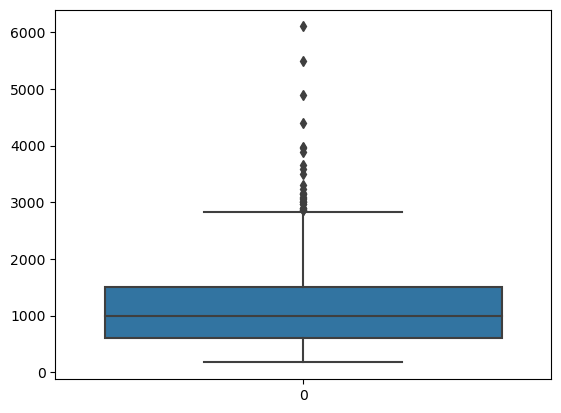

In [82]:
sns.boxplot(df['price_euros']);

In [83]:
Q1 = df['price_euros'].quantile(0.25)
Q3 = df['price_euros'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price_euros'] < (Q1 - 1.5 * IQR)) | (df['price_euros'] > (Q3 + 1.5 * IQR))]

In [84]:
len(outliers)

28

In [85]:
outliers[['company', 'price_euros', 'cpu', 'gpu', 'ram']]

,company,price_euros,cpu,gpu,ram
17,Apple,2858.00,Intel Core i7,AMD Radeon Pro 560,16
196,Razer,6099.00,Intel Core i7 7820HK,Nvidia GeForce GTX 1080,32
204,Dell,3055.00,Intel Xeon E3-1505M V6,Nvidia Quadro M1200,16
238,Asus,3890.00,Intel Core i7 7820HK,Nvidia GeForce GTX 1080,32
247,Asus,2999.00,Intel Core i7 7820HK,Nvidia GeForce GTX 1080,16
297,Dell,2884.86,Intel Core i7 7820HQ,Nvidia Quadro M1200,16
517,Asus,2968.00,Intel Core i7 7700HQ,Nvidia GeForce GTX1080,24
530,Dell,3012.77,Intel Core i7 7700HQ,Nvidia GeForce GTX 1070,16
563,Lenovo,2999.00,Intel Core i7 7700HQ,Nvidia Quadro M620M,8
610,Lenovo,4899.00,Intel Xeon E3-1535M v6,Nvidia Quadro M2200M,32


In [86]:
df['company'].value_counts()

company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

#### Закодируем нечисловые значения:

In [87]:
from sklearn.preprocessing import LabelEncoder 

In [88]:
# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Список столбцов для применения LabelEncoder
non_numeric_cols = [
    'company', 'typename', 'screenresolution', 
    'cpu', 'product', 'gpu', 'opsys', 'Merged_Frequency', 'cpu_brand', 
    'cpu_model', 'gpu_first_word', 'gpu_last_word', 'gpu_middle_word'
]

# Преобразование каждого нечислового столбца
for col in non_numeric_cols:
    # Преобразование столбца в строковый тип данных
    df[col] = df[col].astype(str)
    
    # Применение LabelEncoder к столбцу
    df[col] = label_encoder.fit_transform(df[col])


In [89]:
df.head(2)

,company,product,typename,inches,screenresolution,cpu,ram,gpu,opsys,weight,...,Retina_Display,Merged_Frequency,cpu_brand,cpu_model,core_i,has_ryzen,gpu_first_word,gpu_last_word,gpu_middle_word,Company_dummy
0,1,300,4,13.3,23,54,8,56,8,1.37,...,1,15,1,43,1,0,2,29,11,1
1,1,301,4,13.3,1,54,8,50,8,1.34,...,0,8,1,43,1,0,2,25,9,1


#### Построим модель:

In [90]:
X = df.drop('price_euros', axis=1)
y = df['price_euros']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [95]:
test_predictions = model.predict(X_test)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [97]:
rmse = mean_squared_error(y_test,test_predictions, squared=False)
r2 = r2_score(y_test,test_predictions)

In [98]:
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 349.7417655486981
Коэффициент детерминации (R^2): 0.7625799470985272


In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,6):
    
    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

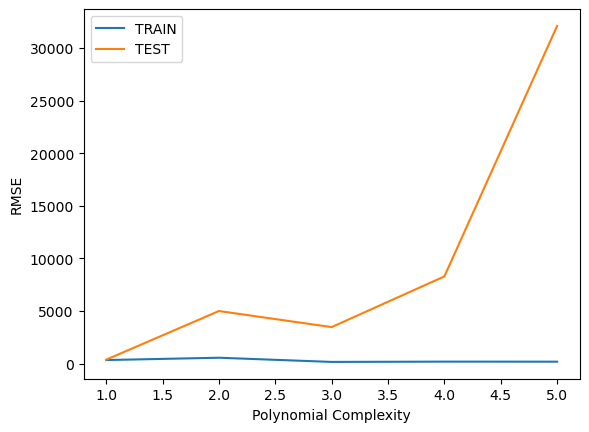

In [101]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [102]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [103]:
# Метод Converter "обучается" на данных, в данном случае, на основе всех колонок X
# Затем этот метод выполняет трансформацию и выдаёт на выходе новые полиномиальные данные
poly_features = polynomial_converter.fit_transform(X)

In [130]:
poly_features.shape

(1275, 464)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [105]:
scaler = StandardScaler()

In [106]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
from sklearn.linear_model import RidgeCV

In [108]:
alphas = np.arange(27, 31, 0.001)

In [109]:
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_absolute_error')

In [110]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([27.   , 27.001, 27.002, ..., 30.997, 30.998, 30.999]),
        scoring='neg_mean_absolute_error')

In [111]:
ridge_cv_model.alpha_

29.018000000002466

In [112]:
test_predictions = ridge_cv_model.predict(X_test)

In [113]:
test_predictions_train = ridge_cv_model.predict(X_train)

In [114]:
rmse = mean_squared_error(y_train,test_predictions_train, squared=False)
r2 = r2_score(y_train,test_predictions_train)

In [115]:
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 245.1270547313024
Коэффициент детерминации (R^2): 0.8748222734942928


In [116]:
rmse = mean_squared_error(y_test,test_predictions, squared=False)
r2 = r2_score(y_test,test_predictions)

In [117]:
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 290.53222407843765
Коэффициент детерминации (R^2): 0.836163365321531


In [118]:
from sklearn.linear_model import LassoCV

In [119]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5)

In [120]:
lasso_cv_model.fit(X_train,y_train)

C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62022.580402866006, tolerance: 34556.874810444664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90826.8481317386, tolerance: 34556.874810444664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100623.55311080813, tolerance: 34556.874810444664
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Py

C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323460.80791951716, tolerance: 34134.88566960161
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 336686.76048895344, tolerance: 34134.88566960161
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275780.6121194735, tolerance: 34134.88566960161
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Pyth

C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110207.07146298885, tolerance: 32618.631796744314
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121088.44974591583, tolerance: 32618.631796744314
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114877.9843165353, tolerance: 32618.631796744314
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nasta\AppData\Roaming\P

C:\Users\nasta\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208527.662685439, tolerance: 35506.640833959944
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(cv=5)

In [121]:
lasso_cv_model.alpha_

2.9862794500696874

In [122]:
test_predictions = lasso_cv_model.predict(X_test)

In [123]:
test_predictions_train = ridge_cv_model.predict(X_train)

In [127]:
rmse = mean_squared_error(y_train,test_predictions_train, squared=False)
r2 = r2_score(y_train,test_predictions_train)

In [128]:
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 245.1270547313024
Коэффициент детерминации (R^2): 0.8748222734942928


In [124]:
rmse = mean_squared_error(y_test,test_predictions, squared=False)
r2 = r2_score(y_test,test_predictions)

In [125]:
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (RMSE): 296.17705058202193
Коэффициент детерминации (R^2): 0.8297350680372555


In [126]:
lasso_cv_model.coef_

array([ 0.00000000e+00, -2.34444035e+01, -0.00000000e+00, -5.02781334e+01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.55882202e+01, -2.63900540e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.80095693e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -8.54105892e+01, -0.00000000e+00, -5.08912015e+01,
       -0.00000000e+00, -3.90334119e+01,  1.64927438e+01,  1.02925452e+02,
        0.00000000e+00,  6.42033660e+01, -3.02762009e+01,  3.25455924e+00,
       -6.63136029e+01,  6.88522547e+01,  0.00000000e+00, -0.00000000e+00,
        4.22275719e+00,  0.00000000e+00,  7.36108040e+00,  0.00000000e+00,
       -1.04123031e+01,  0.00000000e+00,  0.00000000e+00,  4.18833033e+00,
        3.97406143e+01,  